In [ ]:
!pip install geopandas
!pip install geoplot
!pip install crs

!unzip "drive/MyDrive/Datasets/Datasets_HW1.zip" -d "datasets"

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


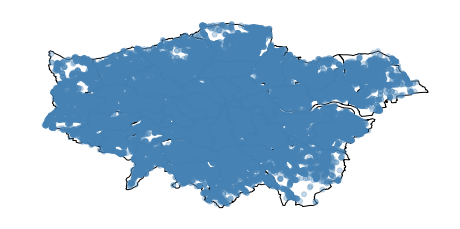

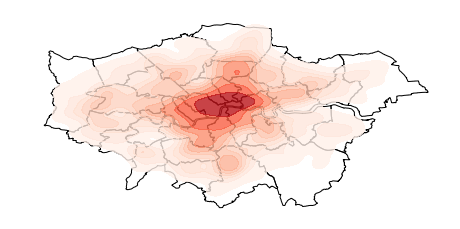

In [ ]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

map = gpd.read_file("datasets/london_district.json")
data = pd.read_csv("datasets/Accident_London.csv")

accident_points = data.apply(
    lambda srs: Point(float(srs["x"]), float(srs["y"])),
    axis='columns'
)

data_geocoded = gpd.GeoDataFrame(data, geometry=accident_points)

ax = gplt.polyplot(map)
gplt.pointplot(data_geocoded, ax=ax, alpha=0.3)

ax = gplt.polyplot(map)
gplt.kdeplot(data_geocoded, shade=True, cmap='Reds', ax=ax, alpha=0.8)
